In regression analysis, we find the relationship between a response (dependent) variable and independent variables.
We also predict the future value of the dependent variable using the established relationship.
Regression is a problem where we try to predict a continuous dependent variable using a set of independent variables.
In this project, I am able to predict revenue based on independent variables.
The evaluate metrics that I used is R-square.
There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model;
they are:
Mean Squared Error (MSE).
Root Mean Squared Error (RMSE).
Mean Absolute Error (MAE)


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
sn.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("IceCreamData.csv")
df.head(4)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960


In [3]:
df.shape

(500, 2)

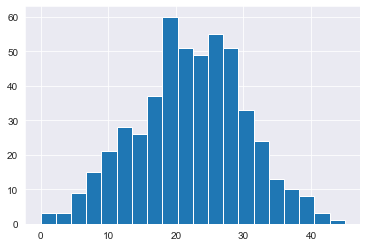

In [4]:
df["Temperature"].hist(bins= 20);

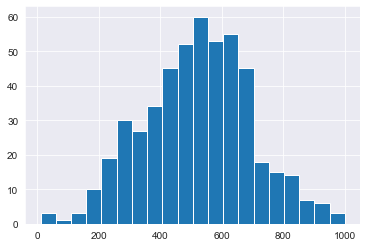

In [5]:
df["Revenue"].hist(bins= 20);

In [6]:
# df.corr()

In [7]:
# Get the sum of null values
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [8]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Temperature,500.0,22.232225,8.096388,0.0,17.122258,22.392791,27.740674,45.0
Revenue,500.0,521.570777,175.404751,10.0,405.558681,529.368565,642.257922,1000.0


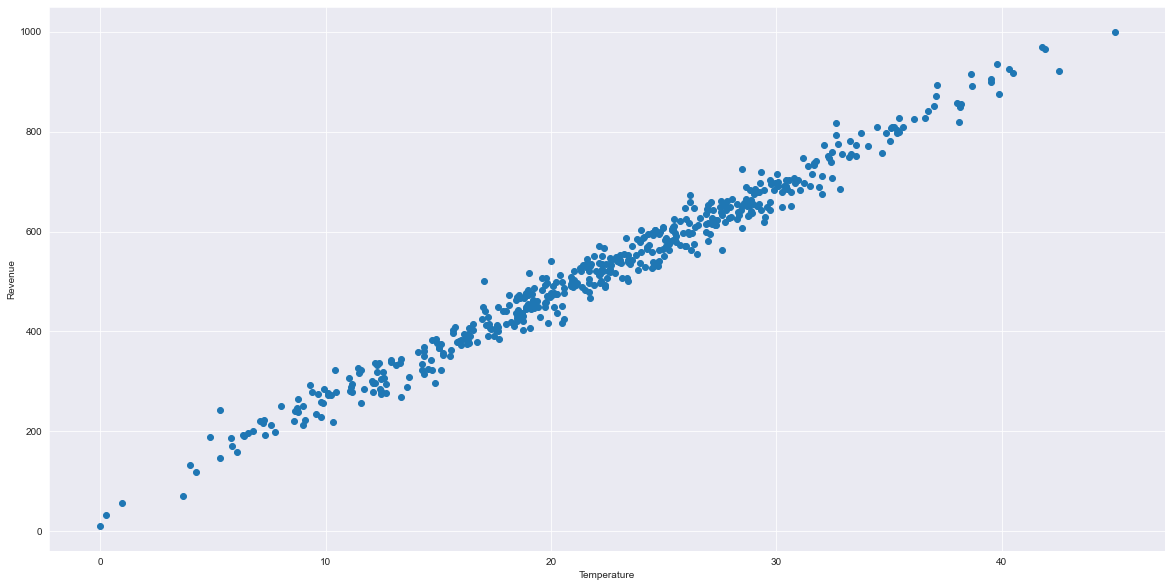

In [9]:
# plt.figure(figsize=(10,7))
plt.figure(figsize=(20,10))
plt.scatter(x=df.Temperature, y= df.Revenue)
plt.xlabel("Temperature")
plt.ylabel("Revenue");

The graph above shows that there is a strong correlation between revenue and temperature i.e if temperature is increasing, the revenue is also increasing.

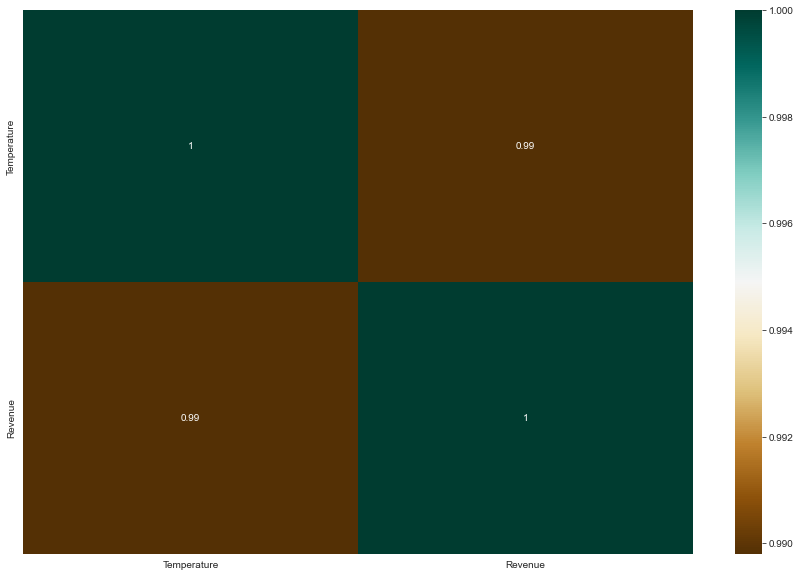

In [10]:
#HEATMAP
# plt.figure(figsize=(10,7))
plt.figure(figsize=(15,10))

# sn.heatmap(df.corr(), cbar=True,annot=True,cmap="crest");
sn.heatmap(df.corr(),cmap="BrBG",annot=True);


In [11]:
# Correlation between the two variables
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


In [12]:
#lINEAR REGRESSION MODEL
model = LinearRegression()

In [13]:
X=df.drop(columns="Revenue", axis=1)
y = df["Revenue"]
print(X,y)

     Temperature
0      24.566884
1      26.005191
2      27.790554
3      20.595335
4      11.503498
..           ...
495    22.274899
496    32.893092
497    12.588157
498    22.362402
499    28.957736

[500 rows x 1 columns] 0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64


In [14]:
df.Temperature.ndim

1

In [15]:
df.Revenue.ndim

1

In [16]:
X.ndim

2

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =2)

In [18]:
len(X_train)

400

In [19]:
len(X_test)

100

In [20]:
len(y_train)

400

In [21]:
len(y_test)

100

In [22]:
# Model fitting
model.fit(X_train,y_train)

LinearRegression()

In [23]:
#y = mx + c

In [24]:
model.intercept_

46.720525135477885

In [25]:
model.coef_

array([21.38145125])

In [26]:
21.51890807*30 + 43.00574598093624


688.5729880809362

In [27]:
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.973546292060864

In [28]:
X_train_predict = model.predict(X_train)
train_data_accuracy_score = r2_score(y_train,X_train_predict)
print("The accuracy of the train data is ", train_data_accuracy_score )

The accuracy of the train data is  0.980831685891456


# The accuracy on the testing data is 97%, which is okay for the prediction

In [29]:
model.predict([[40]])

array([901.978575])

# Visualizing the model prediction


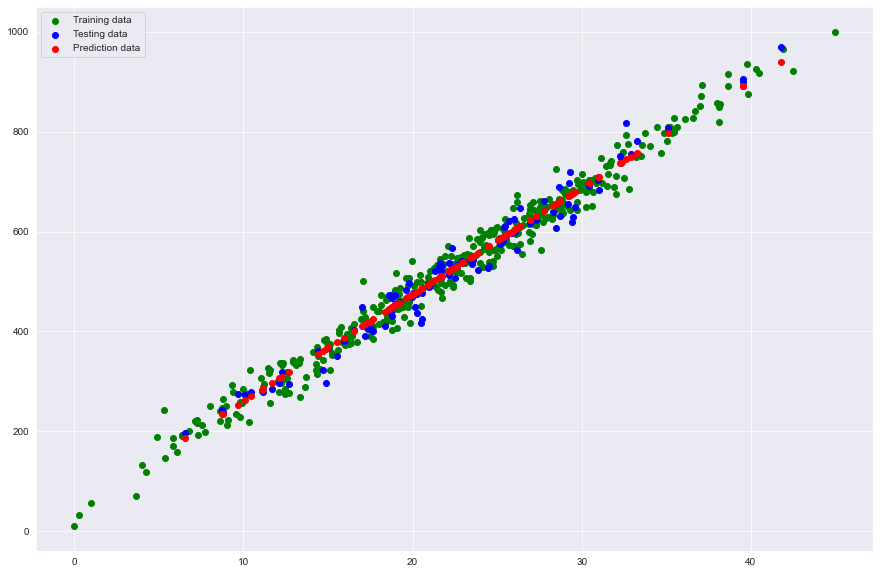

In [30]:
#plot the Training data
# plt.figure(figsize=(10,7))
plt.figure(figsize=(15,10))
plt.scatter(X_train,y_train, c="g", label ="Training data")
#plot the testing data
plt.scatter(X_test,y_test, c="b", label ="Testing data")
#plot the model's prediction in yellow
plt.scatter(X_test,y_pred, c="r", label ="Prediction data")
plt.legend();

As we can see from the graph above, our model predicts well.